***Project Type - EDA***


**Contribution - Individual**

# ***PROJECT SUMMARY***

The notebook appears to be an Exploratory Data Analysis (EDA) on FedEx Logistics Performance.
It includes a problem statement and a dataset overview with 10,324 entries and 33 columns.
Delivery Time Distribution – Analyzing how long packages take to be delivered.
Delay Analysis – Identifying factors that contribute to delivery delays.
Regional Performance – Comparing delivery efficiency across different locations.
Volume of Shipments Over Time – Trends in package shipments across months or years.
Carrier Performance – Evaluating how different carriers impact logistics efficiency.
Customer Satisfaction Metrics – Correlation between delivery speed and customer feedback.
Cost Analysis – Visualizing trends in shipping costs and their influencing factors.
Lost or Damaged Packages – Distribution of problematic shipments.


# ***FedEx Logistics Performance Analysis***

# ***GITHUB LINK***

# ***PROBLEM STATEMENT***

Efficient logistics and timely deliveries are crucial for FedEx to maintain customer satisfaction and operational efficiency. However, delays, lost packages, high shipping costs, and regional inefficiencies can impact overall performance.

This analysis aims to:

Identify key factors affecting delivery times and delays.
Assess the performance of different regions and carriers.
Analyze shipment volume trends and cost variations.
Detect patterns in lost or damaged packages.
Provide insights that help optimize logistics operations and improve customer satisfaction.

# LET'S BEGIN



IMPORTING THE CSV DATA SET


In [ ]:
df=pd.read_csv('/content/SCMS_Delivery_History_Dataset.csv')
df


,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.71
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,Weight Captured Separately,Freight Included in Commodity Cost,5284.04
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,Yes,1392,Freight Included in Commodity Cost,134.03


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

AS WE KNOW FROM THE LINE ITEM INSURANCE THERE ARE 287 BLANK MISSING VALUES WHICH WE HAVE REPLACED WITH THE "0" AND SHIPMENT MODE NULL VALUES TO "NOT DEFINED"


In [ ]:
df["Line Item Insurance (USD)"]=df["Line Item Insurance (USD)"].fillna(0)
df["Shipment Mode"]=df["Shipment Mode"].fillna("NaN")


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 10324 non-null  object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

**checking the missing values  which are null values in the dataset**



In [ ]:
df.isnull().sum()

,0
ID,0
Project Code,0
PQ #,0
PO / SO #,0
ASN/DN #,0
Country,0
Managed By,0
Fulfill Via,0
Vendor INCO Term,0
Shipment Mode,0


In [ ]:
df.describe()

,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Line Item Insurance (USD)
count,10324.000000,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10324.000000
mean,51098.968229,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,233.442523
std,31944.332496,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,494.765813
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,12795.750000,30.000000,408.000000,4.314593e+03,4.120000,0.080000,5.242500
50%,57540.500000,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,42.815000
75%,83648.250000,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,241.750000
max,86823.000000,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,7708.440000


In [ ]:
df["ID"].duplicated().sum()


0

In [ ]:
df["Dosage"]=df["Dosage"].fillna("NaN")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 10324 non-null  object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

In [ ]:
df["Dosage"].head(20)


,Dosage
0,NaN
1,10mg/ml
2,NaN
3,150mg
4,30mg
5,10mg/ml
6,200mg
7,200mg
8,30mg
9,200/50mg


In [ ]:
df.isnull().sum()

,0
ID,0
Project Code,0
PQ #,0
PO / SO #,0
ASN/DN #,0
Country,0
Managed By,0
Fulfill Via,0
Vendor INCO Term,0
Shipment Mode,0


# ***LET BEGIN THE ANALYSIS WITH SOME BIVARIATE/UNIVARIATE ANALYSIS***

***Bivariate analysis of Line item values with respect to country***






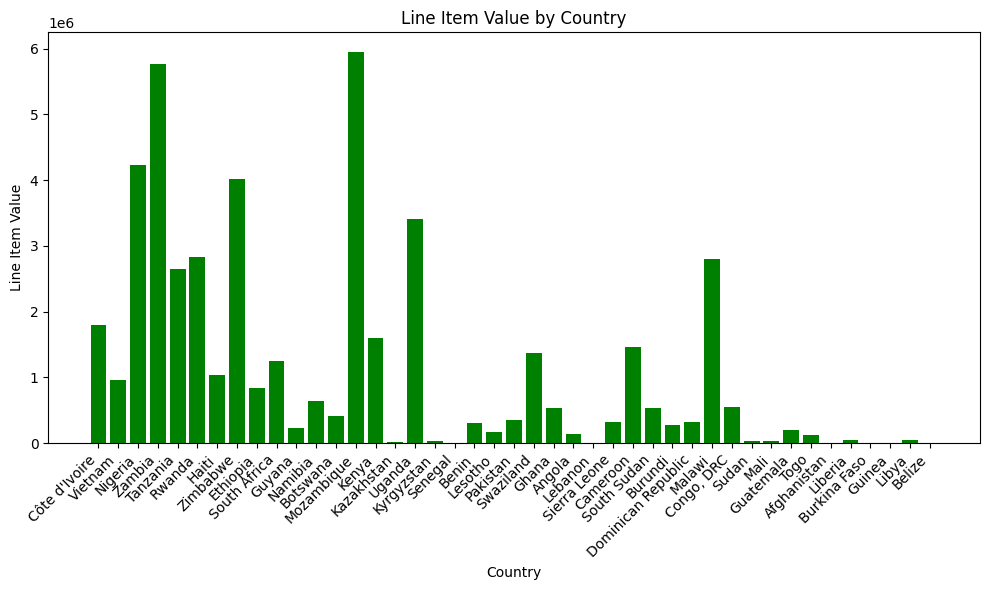

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(df['Country'], df['Line Item Value'], color='green')
plt.xlabel('Country')
plt.ylabel('Line Item Value')
plt.title('Line Item Value by Country')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

***univariate analysis of shipment ***

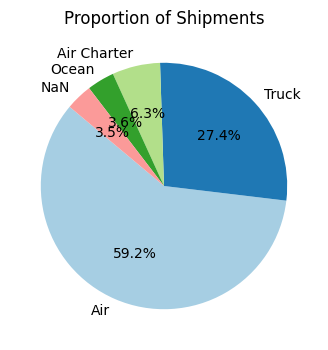

In [ ]:
shipment_counts = df['Shipment Mode'].value_counts()

# Plot a pie chart for proportion of shipments by country
plt.figure(figsize=(5,4))
plt.pie(shipment_counts, labels=shipment_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Proportion of Shipments")
plt.show()

***COUNT OF DIFFERENT TYPES OF SHIPMENT MODES***

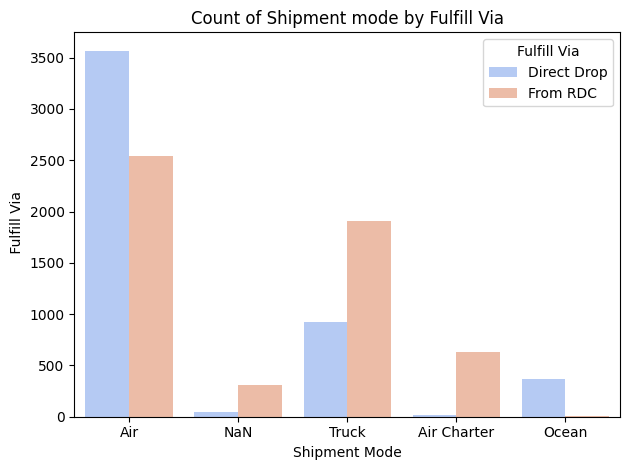

In [ ]:
sns.countplot(x='Shipment Mode', hue='Fulfill Via', data=df,palette='coolwarm')
plt.title("Count of Shipment mode by Fulfill Via")
plt.xlabel("Shipment Mode")
plt.ylabel(" Fulfill Via")
plt.tight_layout()
plt.show()

<ipython-input-31-00cd0b78ef49>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Vendor INCO Term',palette='viridis')


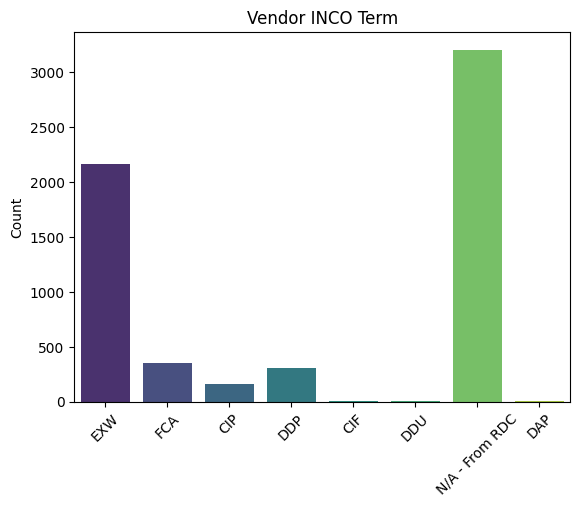

In [ ]:

sns.countplot(data=df, x='Vendor INCO Term',palette='viridis')
plt.title('Vendor INCO Term')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


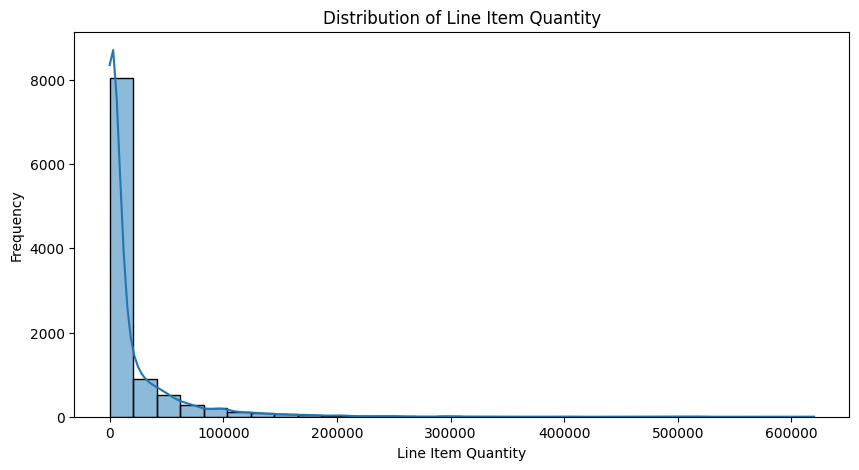

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Line Item Quantity'], bins=30, kde=True)
plt.title('Distribution of Line Item Quantity')
plt.xlabel('Line Item Quantity')
plt.ylabel('Frequency')
plt.show()

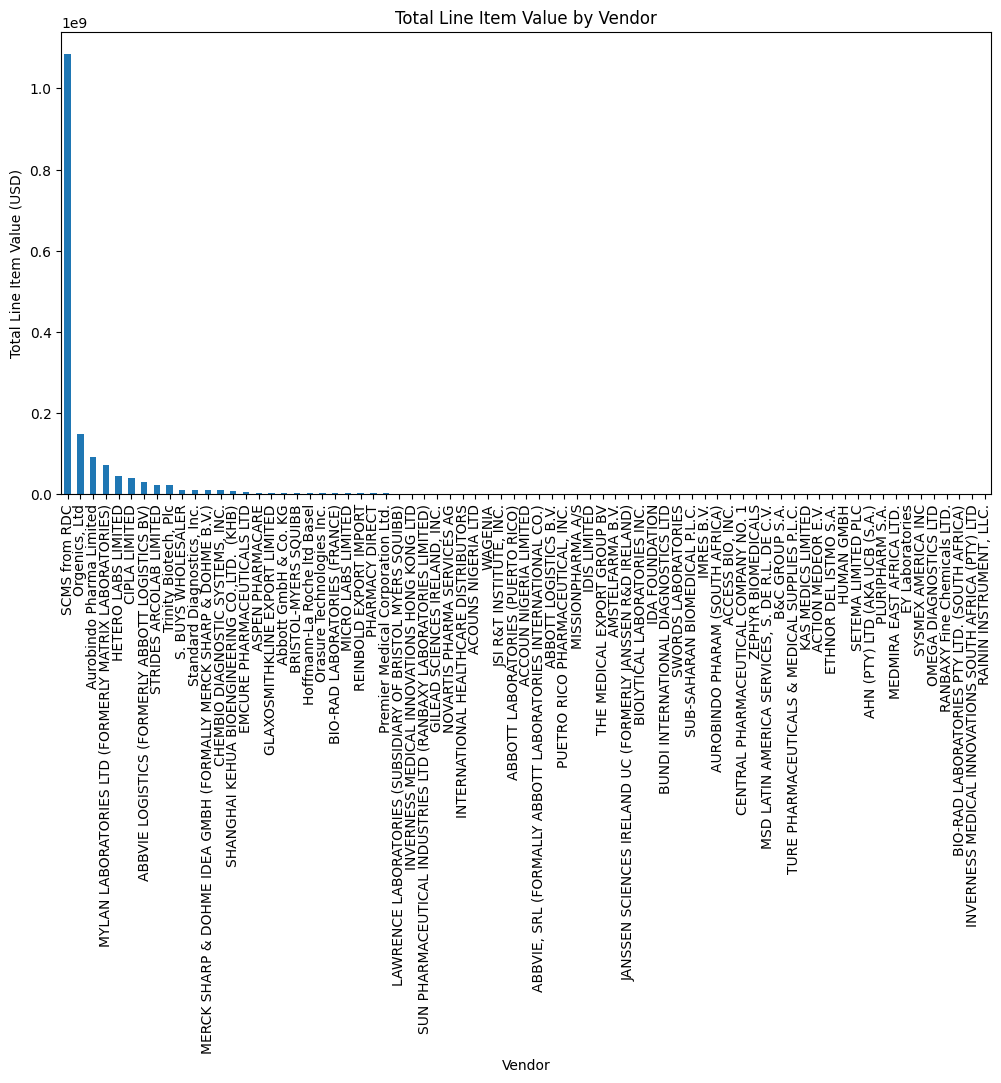

In [ ]:
vendor_totals = df.groupby('Vendor')['Line Item Value'].sum().sort_values(ascending=False)
vendor_totals.plot(kind='bar', figsize=(12, 6))
plt.title('Total Line Item Value by Vendor')
plt.ylabel('Total Line Item Value (USD)')
plt.show()

***DISTRIBUTION OF PRODUCT GROUPS AND THEIR FREQUENCY***

<ipython-input-24-9f356797b42d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_group_counts.index, y=product_group_counts.values, palette='viridis')


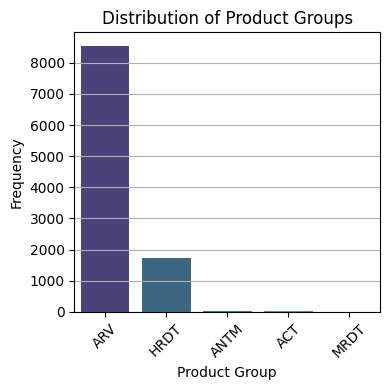

In [ ]:
product_group_counts = df['Product Group'].value_counts()

# Create a bar plot for Product Group distribution
plt.figure(figsize=(4,4))
sns.barplot(x=product_group_counts.index, y=product_group_counts.values, palette='viridis')
plt.title('Distribution of Product Groups')
plt.xlabel('Product Group')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

***NUMBER OF PRDUCTS GROUPS BY SUB CLASSIFICATION***

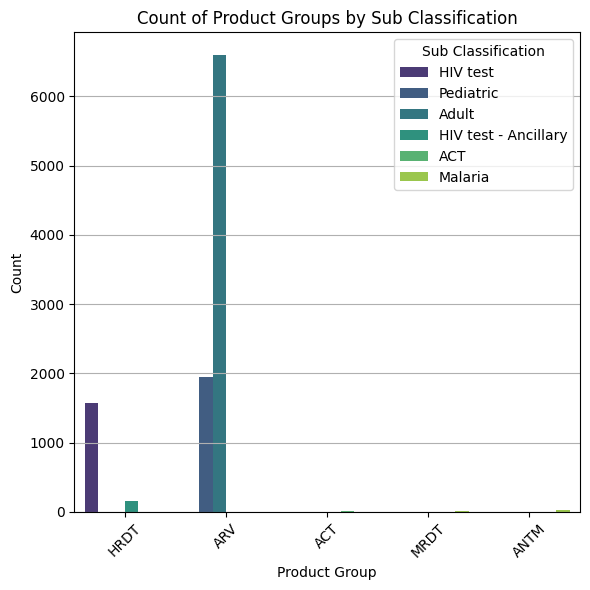

In [ ]:
df = df.dropna(subset=['Product Group', 'Sub Classification'])

# Create a count plot for Product Group
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='Product Group', hue='Sub Classification', palette='viridis')
plt.title('Count of Product Groups by Sub Classification')
plt.xlabel('Product Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sub Classification')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

***CHECKING THE OUTLIERS FROM THE BOX PLOT FOR THE FRIGHT COST***

<ipython-input-26-4dcf67f79ca7>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Shipment Mode', y='Freight Cost (USD)', palette='muted')


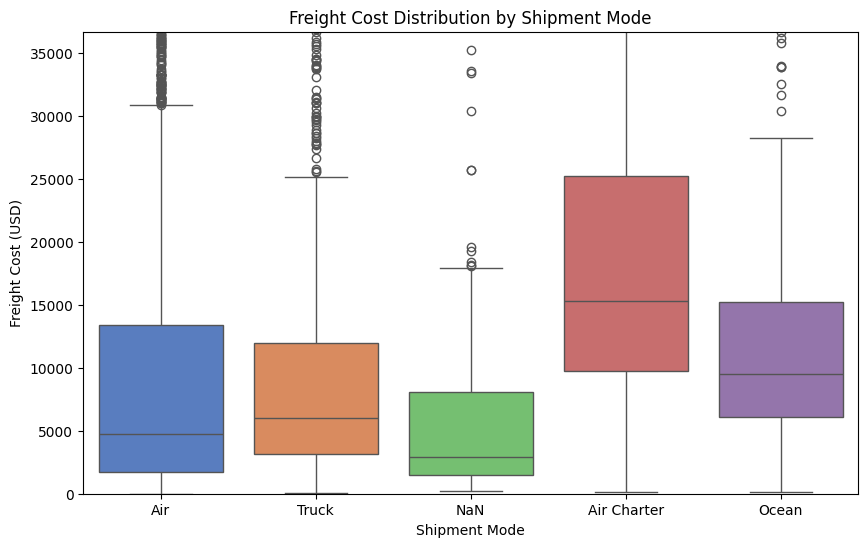

In [ ]:
df['Freight Cost (USD)'] = pd.to_numeric(df['Freight Cost (USD)'], errors='coerce')
df = df.dropna(subset=['Shipment Mode', 'Freight Cost (USD)'])

# Define upper limit to handle outliers
upper_limit = df['Freight Cost (USD)'].quantile(0.95)

# Plot the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Shipment Mode', y='Freight Cost (USD)', palette='muted')
plt.title("Freight Cost Distribution by Shipment Mode")
plt.ylabel("Freight Cost (USD)")
plt.xlabel("Shipment Mode")
plt.ylim(0, upper_limit)  # Restrict y-axis to remove extreme outliers
plt.show()